In [1]:
import torch
from Define_Model.ResNet import ThinResNet
import numpy as np
import kaldi_io
import matplotlib.pyplot as plt
import matplotlib
import os
import pickle

%matplotlib inline
plt.rc('font', family='Times New Roman')


input shape:  torch.Size([1, 1, 2683, 161])


([], <a list of 0 Text yticklabel objects>)

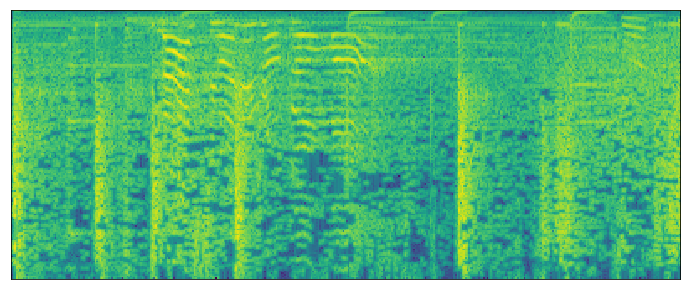

In [2]:
x1 = kaldi_io.read_mat('/home/yangwenhao/local/project/lstm_speaker_verification/data/cnceleb/klsp/klsp/dev/raw_spect_dev.1.ark:23')
x = torch.tensor(x1).reshape(1,1,-1,161).requires_grad_()
print("input shape: ", x.shape)

plt.figure(figsize=(12, 5))

im = plt.imshow(x1[:400].transpose())
plt.xticks([])
plt.yticks([])
# plt.colorbar(im)  # 显示颜色标尺
# print(list(in_feature_grads.keys()))
# print(list(in_feature.keys()))

In [3]:
data_dir = '/home/yangwenhao/local/project/SpeakerVerification-pytorch'
cnc_lores = 'Data/gradient/LoResNet8/cnceleb/klsp_egs_baseline/arcsoft_sgd_rop/Mean_cbam_AVG_dp25_alpha0_em256_wd5e4_var/epoch_50_var_gradient/epoch_50'
# vox1_lores = 'Data/gradient/LoResNet8/vox1/klsp_egs_baseline/arcsoft/None_cbam_em256_alpha0_dp25_wd5e4_dev_var/epoch_40_var_40/epoch_40'
vox1_lores = 'Data/gradient/LoResNet8/vox1/klsp_egs_baseline/arcsoft/None_cbam_em256_alpha0_dp25_wd5e4_dev_var/epoch_40_var2/epoch_40'

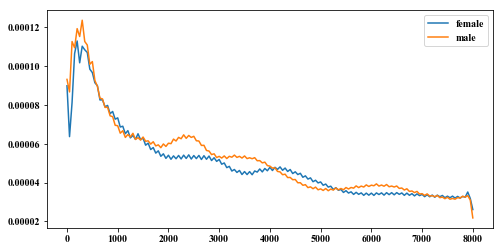

In [28]:
lores_female = 'Data/gradient/LoResNet8/vox1/klsp_egsfemale_baseline/arcsoft_sgd_rop/Mean_cbam_AVG_dp20_alpha0_em256_chn32_wd5e4_var/epoch_50_var/epoch_50'
lores_male = 'Data/gradient/LoResNet8/vox1/klsp_egsmale_baseline/arcsoft_sgd_rop/Mean_cbam_AVG_dp20_alpha0_em256_chn32_wd5e4_var/epoch_50_var/epoch_50'

x = np.arange(161) * 8000 / (161 - 1)

pic_f = os.path.join(data_dir + cnc_lores)

with open(os.path.join(data_dir, lores_female, 'freq.data.pickle'), 'rb') as f:
    fe_data = pickle.load(f)
    
with open(os.path.join(data_dir, lores_male, 'freq.data.pickle'), 'rb') as f:
    ma_data = pickle.load(f)
    
fe_data_mean = fe_data['train.time.mean']
ma_data_mean = ma_data['train.time.mean']

plt.figure(figsize=(8, 4))
# ct_tm /= ct_tm.sum()
# plt.subplot(2,1,1)
plt.plot(x, fe_data_mean)
# plt.subplot(2,1,2)
plt.plot(x, ma_data_mean)

plt.legend(["female", "male"]) #, fontsize=20)


In [4]:
pic_f = os.path.join(data_dir + cnc_lores)

with open(os.path.join(data_dir, cnc_lores, 'freq.data.pickle'), 'rb') as f:
    cnc_data = pickle.load(f)
    
with open(os.path.join(data_dir, vox1_lores, 'freq.data.pickle'), 'rb') as f:
    vox1_data = pickle.load(f)

In [5]:
list(cnc_data.keys())

['train.time.mean',
 'train.time.var',
 'train.data.mean',
 'valid.time.mean',
 'valid.time.var',
 'valid.data.mean',
 'train.veri.time.mean',
 'train.veri.time.var',
 'train.veri.data.mean',
 'train.veri.time.relu',
 'test.veri.time.mean',
 'test.veri.time.var',
 'test.veri.data.mean',
 'test.veri.time.relu']

In [11]:
vox1_data_mean = vox1_data['train.data.mean']
cnc_data_mean = cnc_data['train.data.mean']
x = np.arange(0,161)*8000/160
print(vox1_data_mean.shape)
print(cnc_data_mean.shape)

(161,)
(161,)


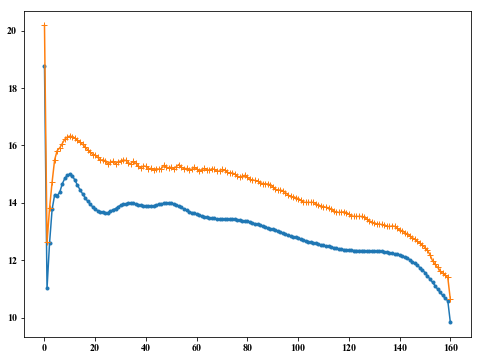

In [7]:
plt.figure(figsize=(8, 6))
# ct_tm /= ct_tm.sum()
# plt.subplot(2,1,1)
plt.plot(vox1_data_mean, marker='.')

# plt.subplot(2,1,2)
plt.plot(cnc_data_mean, marker='+')
# plt.plot(x, c1t_tm, marker='x')
# plt.plot(x, ct_tm, marker='*')
# plt.legend(['vox1', 'cnc1'])
# plt.legend(['vox1', 'vox2', 'cnc1', 'cnc2'])

# plt.plot(x, v1t_tv, marker='.')
# plt.plot(x, vt_tv, marker='+')
# plt.plot(x, c1t_tv, marker='x')
# plt.plot(x, ct_tv, marker='*')

# plt.legend(['vox1', 'vox2', 'cnc1', 'cnc2'])

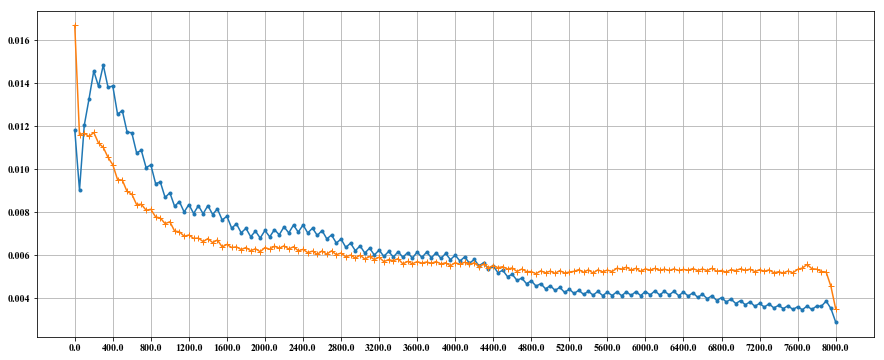

In [22]:
vox1_data_mean = vox1_data['train.time.mean']
vox1_data_mean = np.abs(vox1_data_mean)
cnc_data_mean = cnc_data['train.time.mean']


plt.figure(figsize=(15, 6))
# ct_tm /= ct_tm.sum()
# plt.subplot(2,1,1)
plt.plot(x, vox1_data_mean/vox1_data_mean.sum(), marker='.')

# plt.subplot(2,1,2)
plt.plot(x, cnc_data_mean/cnc_data_mean.sum(), marker='+')
plt.grid()
xticks = np.arange(0,21)*8000/20
_ = plt.xticks(xticks, [str(s) for s in xticks])

array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
        450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
        900.,  950., 1000., 1050., 1100., 1150., 1200., 1250., 1300.,
       1350., 1400., 1450., 1500., 1550., 1600., 1650., 1700., 1750.,
       1800., 1850., 1900., 1950., 2000., 2050., 2100., 2150., 2200.,
       2250., 2300., 2350., 2400., 2450., 2500., 2550., 2600., 2650.,
       2700., 2750., 2800., 2850., 2900., 2950., 3000., 3050., 3100.,
       3150., 3200., 3250., 3300., 3350., 3400., 3450., 3500., 3550.,
       3600., 3650., 3700., 3750., 3800., 3850., 3900., 3950., 4000.,
       4050., 4100., 4150., 4200., 4250., 4300., 4350., 4400., 4450.,
       4500., 4550., 4600., 4650., 4700., 4750., 4800., 4850., 4900.,
       4950., 5000., 5050., 5100., 5150., 5200., 5250., 5300., 5350.,
       5400., 5450., 5500., 5550., 5600., 5650., 5700., 5750., 5800.,
       5850., 5900., 5950., 6000., 6050., 6100., 6150., 6200., 6250.,
       6300., 6350.,